In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/DELL/Downloads/archive2/data.csv")
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


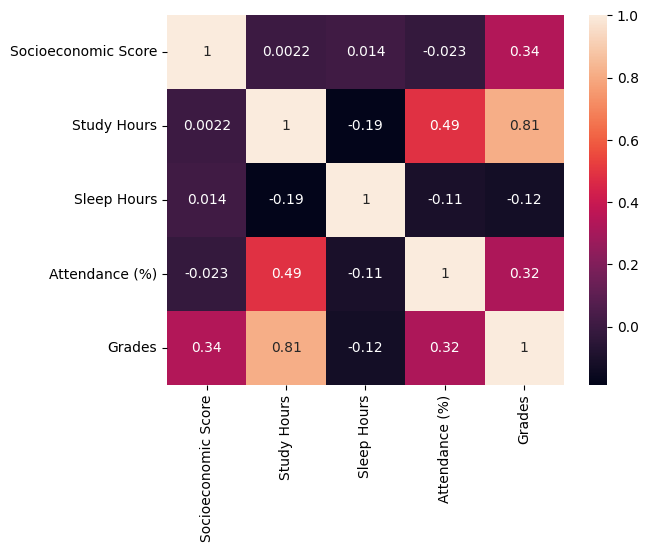

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

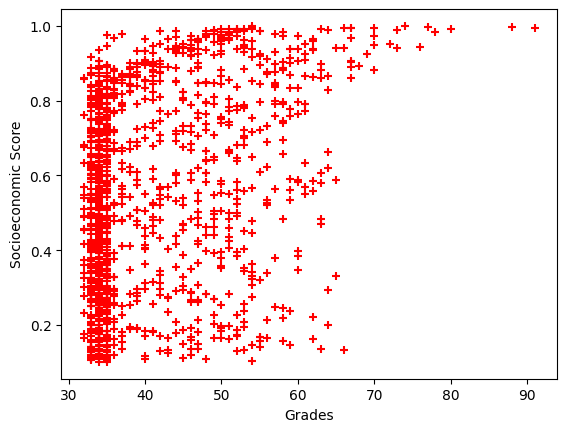

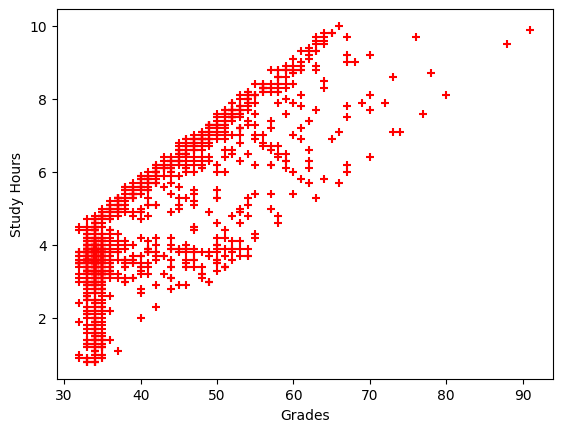

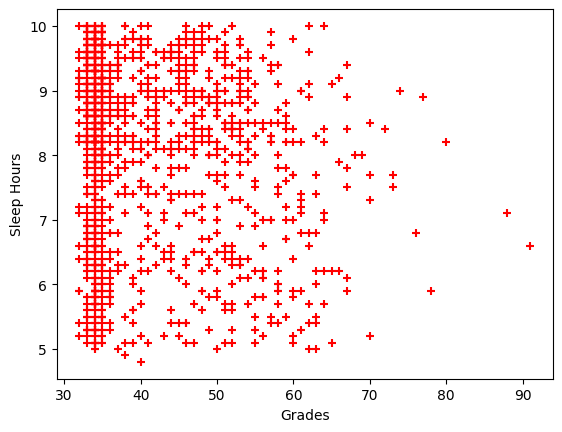

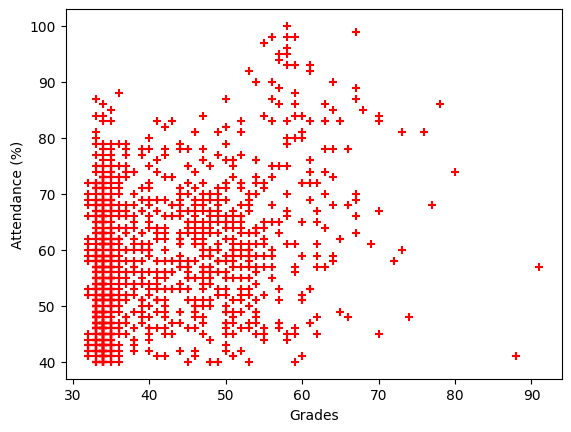

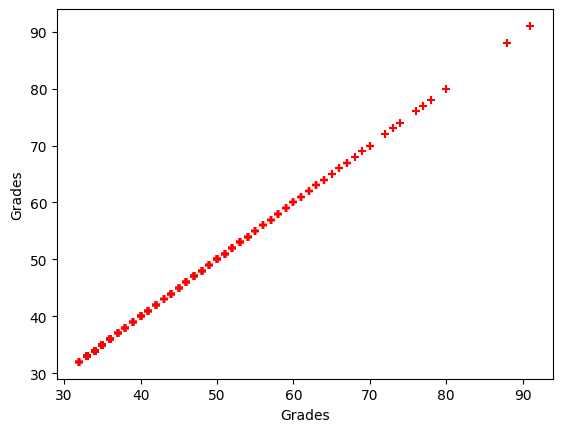

In [17]:
for col in df:
    plt.scatter(df['Grades'], y = df[col], marker='+',color='red')
    plt.xlabel('Grades')
    plt.ylabel(col)
    plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop(['Grades'], axis=1)
y = df['Grades']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7599687439046621

In [21]:
# using statmodels
import statsmodels.api as sm
X = sm.add_constant(x)
sm_model = sm.OLS(y,X).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Grades   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:06:46   Log-Likelihood:                -4056.0
No. Observations:                1388   AIC:                             8122.
Df Residuals:                    1383   BIC:                             8148.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.3401      1.034     16.766      0.000      15.311      19.369
Socioeconomic Score    11.9941      0.463     25.897      0.000      11.086      12.903
Study Hours             4.2632      0.074     57.749      0.000       4.118       4.408
Sleep Hours             0.1519      0.090      1.691      0.091      -0.024       0.328
Attendance (%)         -0.0673      0.012     -5.675      0.000      -0.091      -0.044
==============================================================================
Omnibus:                      225.731   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.614
Skew:                           1.034   Prob(JB):                     6.77e-85
Kurtosis:                       4.557   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

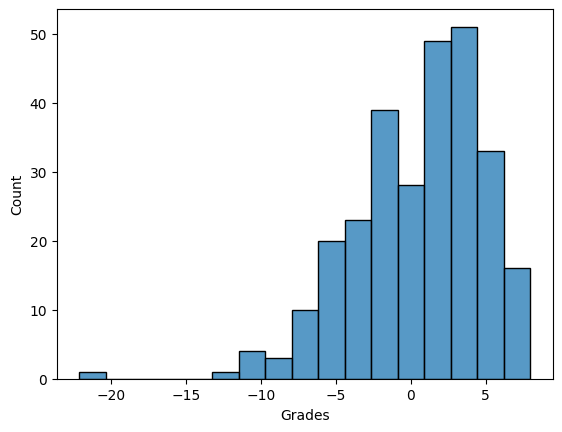

In [22]:
# checking for model validity
# RESIDUAL ANALYSIS
import scipy.stats as stats

y_pred = model.predict(x_test)
residuals= y_pred - y_test
sns.histplot(residuals)
plt.show()


In [ ]:
'''The above shows violation in the normality of residuals assumption, the the shapiro confirms it'''

In [ ]:
# shakira wilt rest for normality
shapiro = stats.shapiro(residuals)
print(shapiro)


ShapiroResult(statistic=np.float64(0.9518574081453943), pvalue=np.float64(6.226479625544682e-08))


In [ ]:
# CHECKING FOR MULTICOLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = x_train.columns
vif_data['VIF']=[variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
print(vif_data)
'''How to Interpret VIF Values:
VIF < 5 → No serious multicollinearity ✅
VIF 5-10 → Moderate multicollinearity ⚠️
VIF > 10 → Severe multicollinearity ❌ (Consider removing/reducing variables)'''
'''How to fix it?
Remove one of the correlated variables
Combine them into one feature (e.g., total study time = study hours + library time)
Use Ridge or Lasso Regression to reduce multicollinearity effects
'''


               Feature        VIF
0  Socioeconomic Score   5.177499
1          Study Hours   8.969846
2          Sleep Hours  16.041785
3       Attendance (%)  24.709404


In [ ]:
# CHECKING FOR AUTO CORRELATION
# Durbin watson test
from statsmodels.stats.stattools import durbin_watson
'''
DW Value	Interpretation
≈ 2	No autocorrelation ✅ (Good model)
< 1.5	Positive autocorrelation ⚠️ (Residuals are correlated; may indicate a trend)
> 2.5	Negative autocorrelation ⚠️ (Residuals alternate in sign; may indicate overfitting)'''

dw_test = durbin_watson(residuals)
dw_test

np.float64(1.8809000701727367)